In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
 
faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] *
                                  faces.images.shape[2])
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


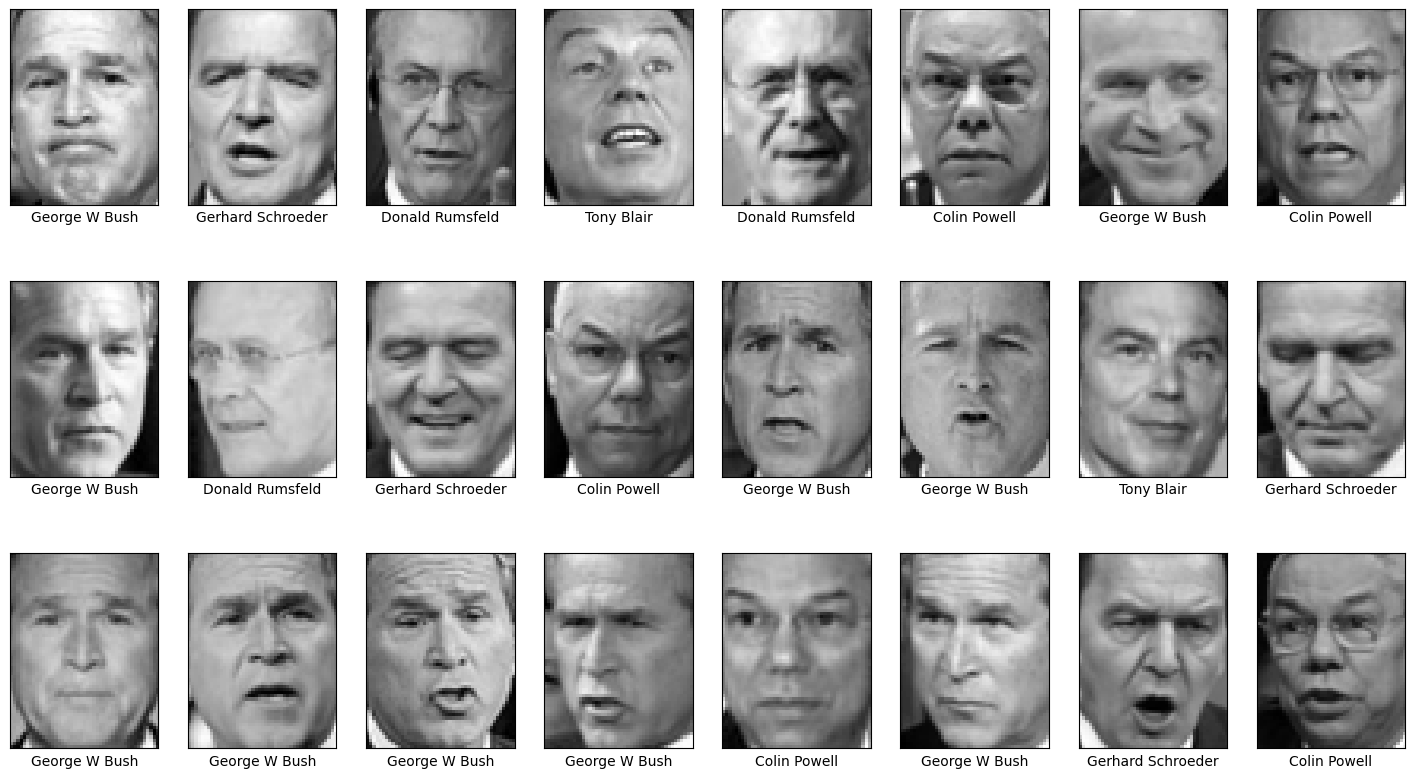

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<Axes: >

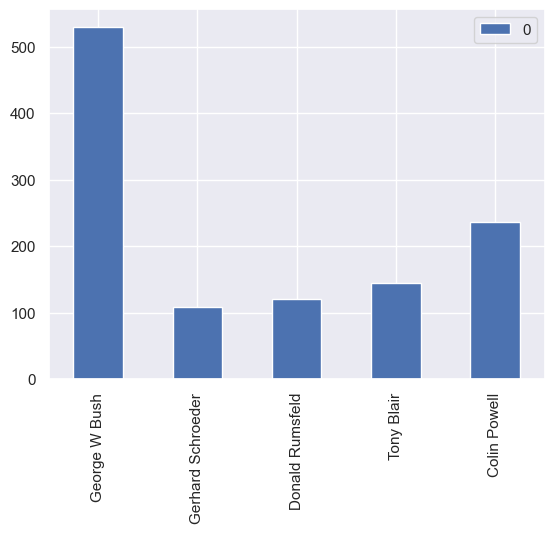

In [4]:
import seaborn as sns
sns.set()

from collections import Counter
counts = Counter(faces.target)
names = {}
 
for key in counts.keys():
    names[faces.target_names[key]] = counts[key]
 
df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [5]:
mask = np.zeros(faces.target.shape, dtype=bool)
 
for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1
     
x = faces.data[mask]
y = faces.target[mask]
x.shape

(500, 2914)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
svc = SVC(kernel='linear')
 
grid = {
    'C': [0.1, 1, 10, 100]
}
 
grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y) # Train the model with different parameters
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

np.float64(0.842)

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
svc = SVC(kernel='linear')
pipe = make_pipeline(scaler, svc)
 
grid = {
    'svc__C': [0.1, 1, 10, 100]
}
 
grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END .........................................svc__C=0.1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ...........................................svc__C=1; total time=   0.0s
[CV] END ..........................................svc__C=10; total time=   0.0s
[CV] END ........................................

np.float64(0.8560000000000001)

In [8]:
grid_search.best_params_

{'svc__C': 0.1}

In [9]:
scaler = StandardScaler()
svc = SVC(kernel='poly')
pipe = make_pipeline(scaler, svc)
 
grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1],
    'svc__degree': [1, 2, 3, 4, 5]
}
 
grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y) # Train the model with different parameter combinations
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.0s
[CV] END ..........svc__C=0.1, svc__degree=1, 

np.float64(0.8560000000000001)

In [10]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.25}

In [11]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,
                                                    stratify=y, random_state=0)

In [12]:
scaler = StandardScaler()
svc = SVC(kernel='linear', C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [13]:
from sklearn.model_selection import cross_val_score
 
cross_val_score(pipe, x, y, cv=5).mean()

np.float64(0.8560000000000001)

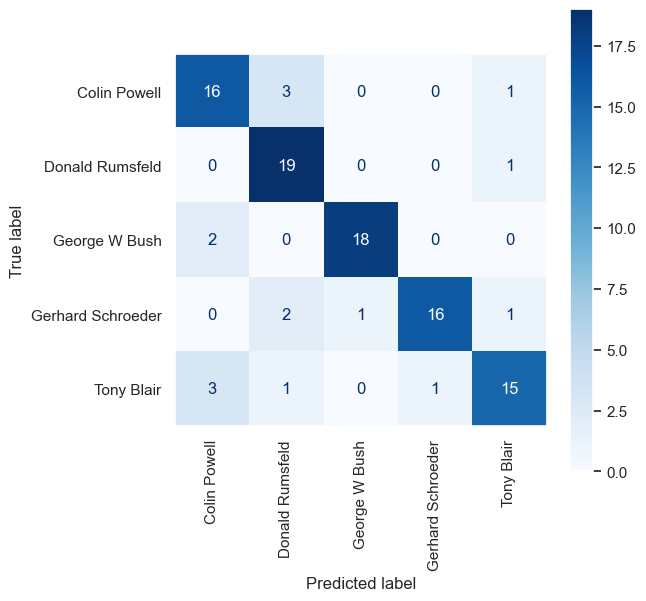

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
cmd.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names,
                   cmap='Blues', xticks_rotation='vertical', ax=ax)